# Промышленность

Чтобы оптимизировать производственные расходы, металлургический комбинат «Стальная птица» решил уменьшить потребление электроэнергии на этапе обработки стали. Для этого комбинату нужно контролировать температуру сплава. Из этого следуют цель исследования и ее ход.

**Цель исследования:**
 -   Построить модель, которая будет предсказывать температуру сплава для уменьшения потребления электроэнергии на этапе обработки стали.
        
      **Ход исследования:**
       
      Считаю 7 CSV-файлов с данными об электродах, подаче сыпучих материалов (объём), подаче сыпучих материалов (время), продувке сплава газом, результатах  измерения температуры, проволочных материалах (объём) и проволочных материалах (время). Так как о данных ничего не известно, придется изучить общую информацию о данных.
      
      Далее я приступлю к исследовательскому анализу, при необходимости сделаю предобработку данных, построию и сделаю выводы о всех 7-ми датасетах. Объединю все датасеты в один по ключу и выполню исследовательский анализ данных общего датафрейма, при необходимости сделаю предобработку. Затем подготовлю общий датафрейм к обучению, то есть разделю его на две выборки, масштабирую и закодирую, и потом обучу как минимум две модели. В конце выберу лучшую модель и проверю ее качество на тестовой выборке, а также напишу общий вывод и рекомендации заказчику.
      
      Таким образом, моё исследование пройдет в восемь этапов:
      
      - Загрузка данных
      - Анализ и предобработка данных
      - Объединение данных
      - Исследовательский анализ и предобработка данных объединённого датафрейма
      - Подготовка данных
      - Обучение моделей машинного обучения
      - Выбор лучшей модели
      - Общий вывод и рекомендации заказчику

# 1. Загрузка данных

In [1]:
!pip install lightgbm -q

In [2]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder, 
    StandardScaler, 
    MinMaxScaler,
    RobustScaler
)
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import scipy.stats as ss
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error
import math as m
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from base64 import b64encode
from IPython.display import display, HTML
import io
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer 
from sklearn.metrics import roc_auc_score
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")
from pandas.plotting import scatter_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score
#from phik import phik
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.svm import SVR
from numpy.random import RandomState
import scipy.stats as st 
import time
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
import socket
from sklearn.ensemble import GradientBoostingRegressor
from math import sqrt
from matplotlib import rcParams
from sklearn.dummy import DummyRegressor

In [3]:
RANDOM_STATE = int('060524')

In [4]:
try:
    arc = pd.read_csv('/datasets/data_arc_new.csv')
    bulk = pd.read_csv('/datasets/data_bulk_new.csv')
    bulk_time = pd.read_csv('/datasets/data_bulk_time_new.csv')
    gas = pd.read_csv('/datasets/data_gas_new.csv')
    temp = pd.read_csv('/datasets/data_temp_new.csv')
    wire = pd.read_csv('/datasets/data_wire_new.csv')
    wire_time = pd.read_csv('/datasets/data_wire_time_new.csv')
except FileNotFoundError:
    arc = pd.read_csv('data_arc_new.csv')
    bulk = pd.read_csv('data_bulk_new.csv')
    bulk_time = pd.read_csv('data_bulk_time_new.csv')
    gas = pd.read_csv('data_gas_new.csv')
    temp = pd.read_csv('data_temp_new.csv')
    wire = pd.read_csv('data_wire_new.csv')
    wire_time = pd.read_csv('data_wire_time_new.csv')

In [5]:
arc.sample(3)

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
4499,968,2019-06-09 23:45:09,2019-06-09 23:46:25,0.620653,0.445320
6139,1339,2019-06-22 18:13:10,2019-06-22 18:18:12,0.810862,0.661893
11928,2593,2019-08-14 06:35:31,2019-08-14 06:36:33,1.369044,0.871760


In [6]:
arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


In [7]:
bulk.sample(3)

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
210,227,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,255.0,NaN,152.0,NaN
3074,3184,NaN,NaN,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,410.0,NaN,200.0,210.0
2080,2152,NaN,NaN,NaN,193.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,290.0,NaN,198.0,161.0


In [8]:
bulk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


In [9]:
bulk_time.sample(3)

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
492,519,NaN,NaN,NaN,2019-05-23 08:25:21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-23 08:15:21,NaN,2019-05-23 08:08:42,2019-05-23 08:01:00
2325,2410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-07 12:11:58,NaN
997,1042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-12 13:51:35,NaN


In [10]:
bulk_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


In [11]:
gas.sample(3)

,key,Газ 1
1063,1066,12.323388
988,991,4.922912
1130,1133,0.364789


In [12]:
gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


In [13]:
temp.sample(3)

,key,Время замера,Температура
1626,291,2019-05-14 19:12:37,1611.0
10312,1844,2019-07-10 21:52:40,1539.0
5036,894,2019-06-07 02:16:26,1606.0


In [14]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           18092 non-null  int64  
 1   Время замера  18092 non-null  object 
 2   Температура   14665 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 424.2+ KB


In [15]:
wire.sample(3)

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
3039,3198,106.142402,30.160000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2210,2321,99.197273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1923,2018,87.054237,12.184641,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
wire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


In [17]:
wire_time.sample(3)

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
1079,1146,2019-06-16 04:40:13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,59,2019-05-05 17:53:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2975,3134,2019-09-03 00:39:15,2019-09-03 00:30:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
wire_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB


Увидели в датасетах `temp`, `bulk`, `bulk_time`, `wire`, `wire_time` пропущенные значения. Во всех датасетах нужно поменять названия столбцов и некоторые типы данных столбцов.

# 2. Анализ и предобработка данныхазчику

In [19]:
def plot_hist_box(df, column, hist_title=None, box_title=None):
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    
    sns.histplot(data=df[column], ax=axes[0])
    if hist_title is not None:
        axes[0].set_title(hist_title)

    sns.boxplot(data=df[column], ax=axes[1])
    if box_title is not None:
        axes[1].set_title(box_title)
        
    plt.show()

Написали функцию для визуализации количественных признаков при помощи гистограммы и боксплота.

# --------------------------------------------------------------------------------------

`data_arc_new.csv`

In [20]:
arc.head(2)

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438


In [21]:
arc.columns = ['key', 'begin_arc', 'end_arc', 'active_power', 'reactive_power']

In [22]:
arc['begin_arc'] = pd.to_datetime(arc['begin_arc'])
arc['end_arc'] = pd.to_datetime(arc['end_arc'])

In [23]:
arc['diff_arc'] = arc['end_arc'] - arc['begin_arc']

In [24]:
arc['minutes'] = round(arc['diff_arc'].dt.total_seconds() / 60.0, 1)
arc.head(2)

,key,begin_arc,end_arc,active_power,reactive_power,diff_arc,minutes
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253,0 days 00:03:48,3.8
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438,0 days 00:03:05,3.1


In [25]:
arc_imp = arc.loc[:, ['key', 'active_power', 'reactive_power','minutes']]

In [26]:
arc_imp = arc_imp.query('reactive_power > -50')

In [27]:
arc_imp['full_power'] = (arc_imp['active_power']**2 + arc_imp['reactive_power'])**0.5

In [28]:
arc_pivot = arc_imp.pivot_table(index = 'key', values = ['active_power',	'reactive_power',	'minutes', 'full_power'], aggfunc = 'sum')
arc_pivot_imp = arc_pivot.reset_index()
arc_pivot_imp.head(2)

,key,active_power,full_power,minutes,reactive_power
0,1,3.036730,4.445794,18.4,2.142821
1,2,2.139408,3.200241,13.5,1.453357


In [29]:
arc_pivot_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   key             3214 non-null   int64  
 1   active_power    3214 non-null   float64
 2   full_power      3214 non-null   float64
 3   minutes         3214 non-null   float64
 4   reactive_power  3214 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


В датасете `arc` поменяли тип данных дат на корректный тип, добавили признак длительности нагрева дугой в минутах `minutes`, изходя из дат начала и конца нагрева и добавили еще один признак - полная мощность ( сумма активной и реактивной мощностей ) `full_power`

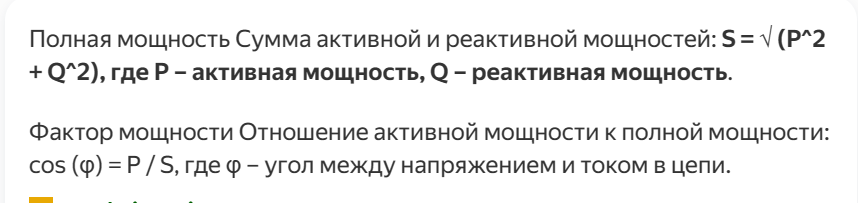

В конце свели таблицу к сумме данных по ключу `key`.

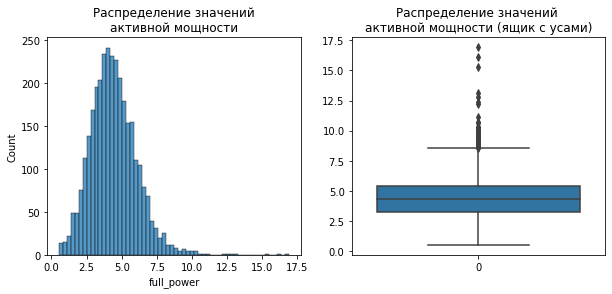

In [30]:
plot_hist_box(arc_pivot_imp, 'full_power', '''Распределение значений
активной мощности''', '''Распределение значений 
активной мощности (ящик с усами)''')

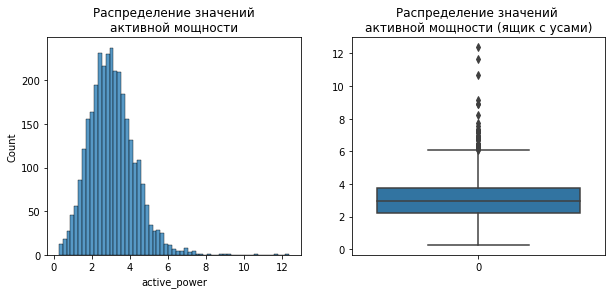

In [31]:
plot_hist_box(arc_pivot_imp, 'active_power', '''Распределение значений
активной мощности''', '''Распределение значений 
активной мощности (ящик с усами)''')

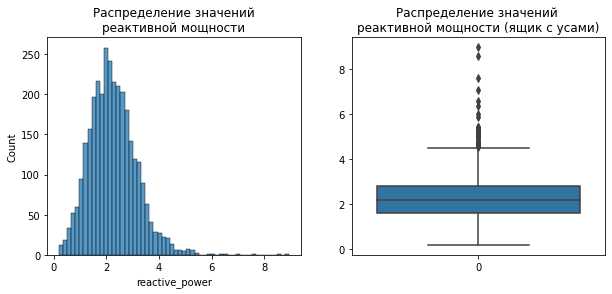

In [32]:
plot_hist_box(arc_pivot_imp, 'reactive_power', '''Распределение значений
реактивной мощности''', '''Распределение значений 
реактивной мощности (ящик с усами)''')

In [33]:
arc_pivot_imp[arc_pivot_imp['reactive_power'] < -50]

,key,active_power,full_power,minutes,reactive_power


In [34]:
#arc_pivot_imp = arc_pivot_imp.query('reactive_power > -50')

Сразу же удаляем аномальный выброс в столбце `reactive_power`, равный -715

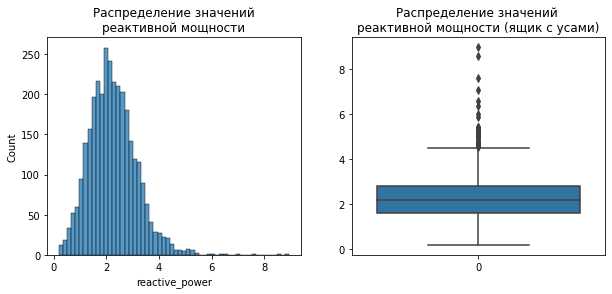

In [35]:
plot_hist_box(arc_pivot_imp, 'reactive_power', '''Распределение значений
реактивной мощности''', '''Распределение значений 
реактивной мощности (ящик с усами)''')

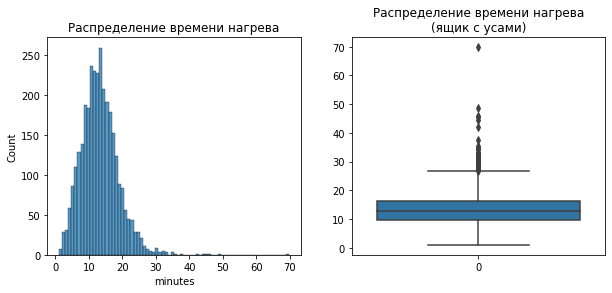

In [36]:
plot_hist_box(arc_pivot_imp, 'minutes', '''Распределение времени нагрева''', '''Распределение времени нагрева
(ящик с усами)''')

Можем заметить, что во всех признаках имеются статистические выбросы, аномальных выбросов нет, один мы удалили из столбца `reactive_power`.

# --------------------------------------------------------------------------------------

`data_bulk_new.csv`

In [37]:
bulk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


In [38]:
bulk = bulk.fillna(0)
bulk.head(2)

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,0.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,150.0,154.0
1,2,0.0,0.0,0.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,149.0,154.0


В 12, 14 и 15-ой подачах материалов больше половины данных, поэтому можем взять эти признаки, заполнить пропущенные значения нулями, так как удалить их не можем из-за большой потери данных, и продолжить работать с ними.

In [39]:
bulk_imp = bulk[['key', 'Bulk 12', 'Bulk 14', 'Bulk 15']]
bulk_imp.columns = ['key', 'bulk_12', 'bulk_14', 'bulk_15']

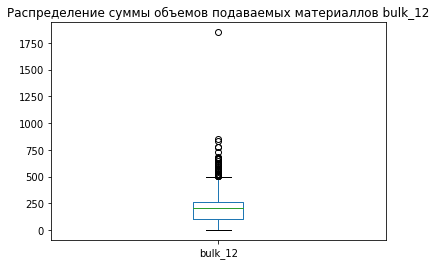

In [40]:
bulk_imp['bulk_12'].plot(kind = 'box')
plt.title('Распределение суммы объемов подаваемых материаллов bulk_12')
plt.show()

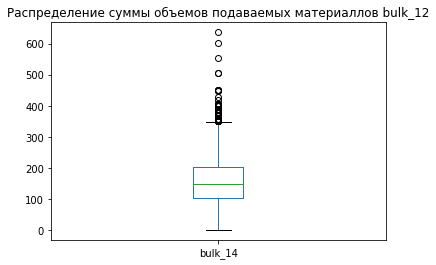

In [41]:
bulk_imp['bulk_14'].plot(kind = 'box')
plt.title('Распределение суммы объемов подаваемых материаллов bulk_12')
plt.show()

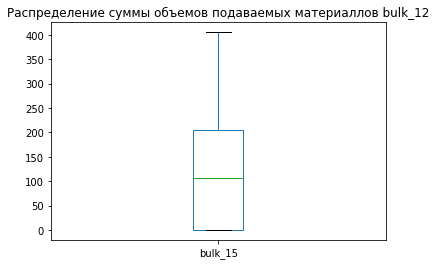

In [42]:
bulk_imp['bulk_15'].plot(kind = 'box')
plt.title('Распределение суммы объемов подаваемых материаллов bulk_12')
plt.show()

In [43]:
bulk_imp = bulk_imp[bulk_imp['bulk_12'] < 1000]

Удалили одну аномалию в столбце `bulk_12`.

In [44]:
bulk_imp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3128 entries, 0 to 3128
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3128 non-null   int64  
 1   bulk_12  3128 non-null   float64
 2   bulk_14  3128 non-null   float64
 3   bulk_15  3128 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 122.2 KB


# --------------------------------------------------------------------------------------

`data_bulk_time_new.csv`

In [45]:
bulk_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


In [46]:
bulk_time = bulk_time.fillna(0)
bulk_time.head(2)

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,0,0,0,2019-05-03 11:28:48,0,0,0,0,0,0,0,2019-05-03 11:24:31,0,2019-05-03 11:14:50,2019-05-03 11:10:43
1,2,0,0,0,2019-05-03 11:36:50,0,0,0,0,0,0,0,2019-05-03 11:53:30,0,2019-05-03 11:48:37,2019-05-03 11:44:39


Из этого датасета найдем разницу между самым большим и самым маленьким временем подачи сыпучих материалов в каждой партии.

In [47]:
for col in bulk_time.columns[1:]:
    bulk_time[col] = pd.to_datetime(bulk_time[col], errors='coerce')

bulk_time.head(2)

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,1970-01-01,1970-01-01,1970-01-01,2019-05-03 11:28:48,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,2019-05-03 11:24:31,1970-01-01,2019-05-03 11:14:50,2019-05-03 11:10:43
1,2,1970-01-01,1970-01-01,1970-01-01,2019-05-03 11:36:50,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,2019-05-03 11:53:30,1970-01-01,2019-05-03 11:48:37,2019-05-03 11:44:39


In [48]:
df_filtered = bulk_time.loc[:, bulk_time.columns[1:]].apply(lambda x: x[x >= pd.Timestamp('2019-05-03')])
df_filtered.head(2)

,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,NaT,NaT,NaT,2019-05-03 11:28:48,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 11:24:31,NaT,2019-05-03 11:14:50,2019-05-03 11:10:43
1,NaT,NaT,NaT,2019-05-03 11:36:50,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 11:53:30,NaT,2019-05-03 11:48:37,2019-05-03 11:44:39


In [49]:
max_date = df_filtered.max(axis=1)
min_date = df_filtered.min(axis=1)

In [50]:
bulk_time['date_difference'] = max_date - min_date

In [51]:
bulk_time['bulk_time_min'] = round(bulk_time['date_difference'].dt.total_seconds() / 60.0, 1)
bulk_time.head(2)

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15,date_difference,bulk_time_min
0,1,1970-01-01,1970-01-01,1970-01-01,2019-05-03 11:28:48,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,2019-05-03 11:24:31,1970-01-01,2019-05-03 11:14:50,2019-05-03 11:10:43,0 days 00:18:05,18.1
1,2,1970-01-01,1970-01-01,1970-01-01,2019-05-03 11:36:50,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,2019-05-03 11:53:30,1970-01-01,2019-05-03 11:48:37,2019-05-03 11:44:39,0 days 00:16:40,16.7


In [52]:
bulk_time_imp = bulk_time.loc[:, ['key', 'bulk_time_min']]
bulk_time_imp.head(2)

,key,bulk_time_min
0,1,18.1
1,2,16.7


In [53]:
bulk_time_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   key            3129 non-null   int64  
 1   bulk_time_min  3129 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.0 KB


Нашли признак длительности подачи сыпучих материалов `bulk_time_min`.

# --------------------------------------------------------------------------------------

`data_gas_new.csv`

In [54]:
gas.head(3)

,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793


In [55]:
gas.columns = ['key', 'gas']

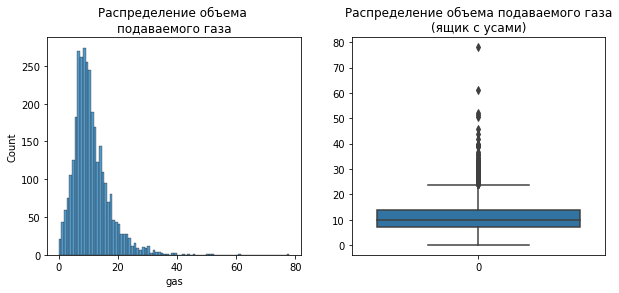

In [56]:
plot_hist_box(gas, 'gas', '''Распределение объема 
подаваемого газа''', '''Распределение объема подаваемого газа
(ящик с усами)''')

Здесь никаких действий не требуется.

# --------------------------------------------------------------------------------------

`data_temp_new.csv`

In [57]:
temp.head(3)

,key,Время замера,Температура
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0


In [58]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           18092 non-null  int64  
 1   Время замера  18092 non-null  object 
 2   Температура   14665 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 424.2+ KB


В датасете с целевым признаком `temp` сначала переведем время замера в тип даты, затем сгруппируем датасет по ключу `key` так, чтобы мы получили первое время замера температуры и последнее в каждой партии, а также первую и последнюю температуру.

In [59]:
temp.columns = ['key', 'meas_time', 'temp']

In [60]:
temp['meas_time'] = pd.to_datetime(temp['meas_time'])

In [61]:
temp_imp = temp.dropna().reset_index(drop=True)

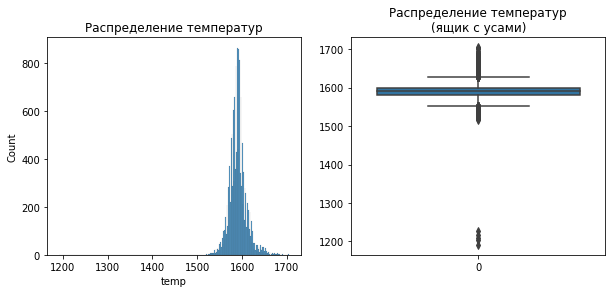

In [62]:
plot_hist_box(temp_imp, 'temp', '''Распределение температур''', '''Распределение температур
(ящик с усами)''')

Увидили на графике аномальное значение целевого признака, удаляем его.

In [63]:
temp_imp = temp_imp[temp_imp['temp'] > 1500]

In [64]:
final_temp_imp = temp_imp.groupby(by = 'key').agg(['first', 'last']).reset_index()
final_temp_imp.columns = ['key', 'first_time', 'finish_time', 'first_temp', 'finish_temp']

In [65]:
final_temp_imp.head(2)

,key,first_time,finish_time,first_temp,finish_temp
0,1,2019-05-03 11:02:04,2019-05-03 11:30:38,1571.0,1613.0
1,2,2019-05-03 11:34:04,2019-05-03 11:55:09,1581.0,1602.0


In [66]:
final_temp_imp['time_diff'] = final_temp_imp['finish_time'] - final_temp_imp['first_time']
final_temp_imp['time_diff'] = round(final_temp_imp['time_diff'].dt.total_seconds() / 60.0, 1)
final_temp_imp = final_temp_imp.query('key < 2500')
final_temp_imp.tail(2)

,key,first_time,finish_time,first_temp,finish_temp,time_diff
2475,2498,2019-08-10 12:58:11,2019-08-10 13:23:31,1591.0,1594.0,25.3
2476,2499,2019-08-10 13:33:21,2019-08-10 13:58:58,1569.0,1603.0,25.6


In [67]:
final_temp_imp = final_temp_imp.drop(['first_time',	'finish_time'], axis = 1)

In [68]:
final_temp_imp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2477 entries, 0 to 2476
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   key          2477 non-null   int64  
 1   first_temp   2477 non-null   float64
 2   finish_temp  2477 non-null   float64
 3   time_diff    2477 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 96.8 KB


Удалили все значения температур, где в партиях были замеры всего один раз, а именно такие замеры были после 2500-ой партии. Получили датасет из времени начального и конечного замера, температуры начального и конечного замера, и длительности всех замеров по партиям.

# --------------------------------------------------------------------------------------

`data_wire_new.csv`

In [69]:
wire.head(3)

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
wire = wire.fillna(0)

In [71]:
wire.head(5)

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
wire_imp = wire[['key', 'Wire 1']]
wire_imp.columns = ['key', 'wire_1']

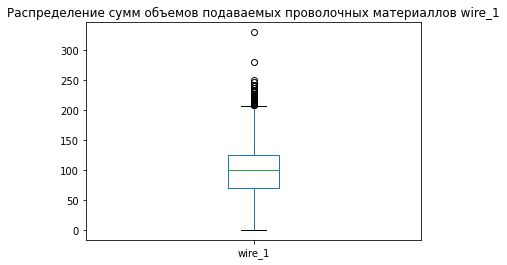

In [73]:
wire_imp['wire_1'].plot(kind = 'box')
plt.title('Распределение сумм объемов подаваемых проволочных материаллов wire_1')
plt.show()

In [74]:
wire_imp[wire_imp['wire_1'] > 270]

,key,wire_1
1392,1464,280.987214
1732,1821,330.314424


In [75]:
wire_imp = wire_imp[wire_imp['wire_1'] < 270]

In [76]:
wire_imp.head(2)

,key,wire_1
0,1,60.059998
1,2,96.052315


In [77]:
wire_imp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3079 entries, 0 to 3080
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3079 non-null   int64  
 1   wire_1  3079 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 72.2 KB


Сделали то же самое, что и для датасета `bulk`. Заполнили все пропуски нулями, увидили один столбец `wire_1`, в котором данных больше половины, и удалили из него 2 аномалии. Сохранили этот признак вместе с ключом. 

# --------------------------------------------------------------------------------------

`data_wire_time_new.csv`

In [78]:
wire_time.head(3)

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:06:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:11:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
wire_time = wire_time.fillna(0)

In [80]:
for col in wire_time.columns[1:]:
    wire_time[col] = pd.to_datetime(wire_time[col], errors='coerce')
df_filtered = wire_time.loc[:, wire_time.columns[1:]].apply(lambda x: x[x >= pd.Timestamp('2019-05-03')])
max_date = df_filtered.max(axis=1)
min_date = df_filtered.min(axis=1)
wire_time['date_difference'] = max_date - min_date
wire_time['wire_time_min'] = round(wire_time['date_difference'].dt.total_seconds() / 60.0, 1)
wire_time.sample(5)

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9,date_difference,wire_time_min
2817,2970,2019-08-28 09:27:07,1970-01-01 00:00:00,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,0 days 00:00:00,0.0
2142,2252,2019-08-01 14:24:05,1970-01-01 00:00:00,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,0 days 00:00:00,0.0
184,202,2019-05-11 06:43:00,2019-05-11 06:31:47,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,0 days 00:11:13,11.2
1284,1353,2019-06-23 14:44:58,1970-01-01 00:00:00,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,0 days 00:00:00,0.0
1843,1933,2019-07-19 23:01:37,1970-01-01 00:00:00,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,0 days 00:00:00,0.0


In [81]:
wire_time_imp = wire_time.loc[:, ['key', 'wire_time_min']]
wire_time_imp.sample(5)

,key,wire_time_min
1370,1442,0.0
1029,1089,0.0
165,181,0.0
1656,1736,0.0
2094,2192,9.4


Text(0.5, 1.0, 'Распределение')

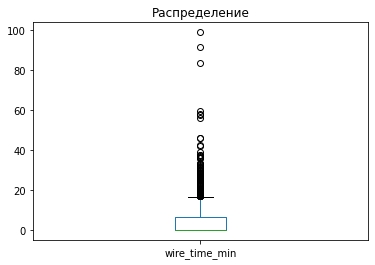

In [82]:
wire_time_imp['wire_time_min'].plot(kind = 'box')
plt.title('Распределение')

In [83]:
wire_time_imp = wire_time_imp[wire_time_imp['wire_time_min'] < 70]

Сделали то же самое, что и для датасета `bulk_time`. Добавили признак разницы самого большого времени подачи проволочных материалов и самого маленького. Также удалили 3 аномалии.

# --------------------------------------------------------------------------------------

Добавили признаки `full_power`, `minutes`, `bulk_time_min`, `wire_time_min`, `first_temp`, `finish_temp`, `time_diff`. Из датасетов также отобрали признаки, которые увеличат корреляцию с целевым признаком: `bulk_12`, `bulk_14`, `bulk_15`, `wire_1`. Удалили аномальные выбросы и подготовили датасеты к объединению в один.

# 3. Объединение данных

In [84]:
merged_data_1 = pd.merge(final_temp_imp, arc_pivot_imp, on = 'key', how = 'inner')

In [85]:
merged_data_2 = pd.merge(merged_data_1, bulk_imp, on = 'key', how = 'inner')

In [86]:
merged_data_3 = pd.merge(merged_data_2, bulk_time_imp, on = 'key', how = 'inner')

In [87]:
merged_data_4 = pd.merge(merged_data_3, gas, on = 'key', how = 'inner')

In [88]:
merged_data_5 = pd.merge(merged_data_4, wire_imp, on = 'key', how = 'inner')

In [89]:
merged_data = pd.merge(merged_data_5, wire_time_imp, on = 'key', how = 'inner')
merged_data.head(2)

,key,first_temp,finish_temp,time_diff,active_power,full_power,minutes,reactive_power,bulk_12,bulk_14,bulk_15,bulk_time_min,gas,wire_1,wire_time_min
0,1,1571.0,1613.0,28.6,3.036730,4.445794,18.4,2.142821,206.0,150.0,154.0,18.1,29.749986,60.059998,0.0
1,2,1581.0,1602.0,21.1,2.139408,3.200241,13.5,1.453357,206.0,149.0,154.0,16.7,12.555561,96.052315,0.0


In [90]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2324 entries, 0 to 2323
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   key             2324 non-null   int64  
 1   first_temp      2324 non-null   float64
 2   finish_temp     2324 non-null   float64
 3   time_diff       2324 non-null   float64
 4   active_power    2324 non-null   float64
 5   full_power      2324 non-null   float64
 6   minutes         2324 non-null   float64
 7   reactive_power  2324 non-null   float64
 8   bulk_12         2324 non-null   float64
 9   bulk_14         2324 non-null   float64
 10  bulk_15         2324 non-null   float64
 11  bulk_time_min   2324 non-null   float64
 12  gas             2324 non-null   float64
 13  wire_1          2324 non-null   float64
 14  wire_time_min   2324 non-null   float64
dtypes: float64(14), int64(1)
memory usage: 290.5 KB


Объединили все обработанные датасеты. Заметим, что в датафрейме 2477 строк, в некоторых столбцах есть пропуски. Нужно обработать датафрейм и провести анализ.

# 4. Исследовательский анализ и предобработка данных объединённого датафрейма

In [91]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2324 entries, 0 to 2323
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   key             2324 non-null   int64  
 1   first_temp      2324 non-null   float64
 2   finish_temp     2324 non-null   float64
 3   time_diff       2324 non-null   float64
 4   active_power    2324 non-null   float64
 5   full_power      2324 non-null   float64
 6   minutes         2324 non-null   float64
 7   reactive_power  2324 non-null   float64
 8   bulk_12         2324 non-null   float64
 9   bulk_14         2324 non-null   float64
 10  bulk_15         2324 non-null   float64
 11  bulk_time_min   2324 non-null   float64
 12  gas             2324 non-null   float64
 13  wire_1          2324 non-null   float64
 14  wire_time_min   2324 non-null   float64
dtypes: float64(14), int64(1)
memory usage: 290.5 KB


In [92]:
merged_data.describe()

,key,first_temp,finish_temp,time_diff,active_power,full_power,minutes,reactive_power,bulk_12,bulk_14,bulk_15,bulk_time_min,gas,wire_1,wire_time_min
count,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000
mean,1251.158778,1587.309811,1593.390706,38.475473,3.119905,4.502532,13.439028,2.296937,207.646730,153.736661,120.080034,16.373580,11.297911,102.394876,3.419923
std,714.717332,23.548404,11.105165,22.019624,1.205240,1.646069,5.609476,0.893288,152.929135,80.679659,84.602683,13.506184,6.110757,43.027573,5.924045
min,1.000000,1519.000000,1543.000000,4.500000,0.267676,0.517570,1.000000,0.196228,0.000000,0.000000,0.000000,0.000000,0.008399,0.000000,0.000000
25%,629.750000,1571.000000,1587.000000,26.300000,2.295340,3.367215,9.700000,1.670282,105.000000,105.000000,0.000000,8.375000,7.278086,73.293476,0.000000
50%,1253.500000,1587.000000,1593.000000,34.100000,3.034613,4.372155,13.000000,2.224983,206.000000,149.000000,107.000000,14.900000,10.090391,101.119202,0.000000
75%,1867.250000,1603.000000,1598.000000,46.400000,3.830808,5.492688,16.600000,2.826381,281.250000,204.000000,204.000000,22.300000,14.175144,128.075222,6.600000
max,2499.000000,1660.000000,1653.000000,394.600000,12.375636,16.918660,69.800000,8.949049,853.000000,450.000000,405.000000,228.000000,60.935689,249.958786,58.000000


In [93]:
merged_data = merged_data.dropna().reset_index(drop=True)

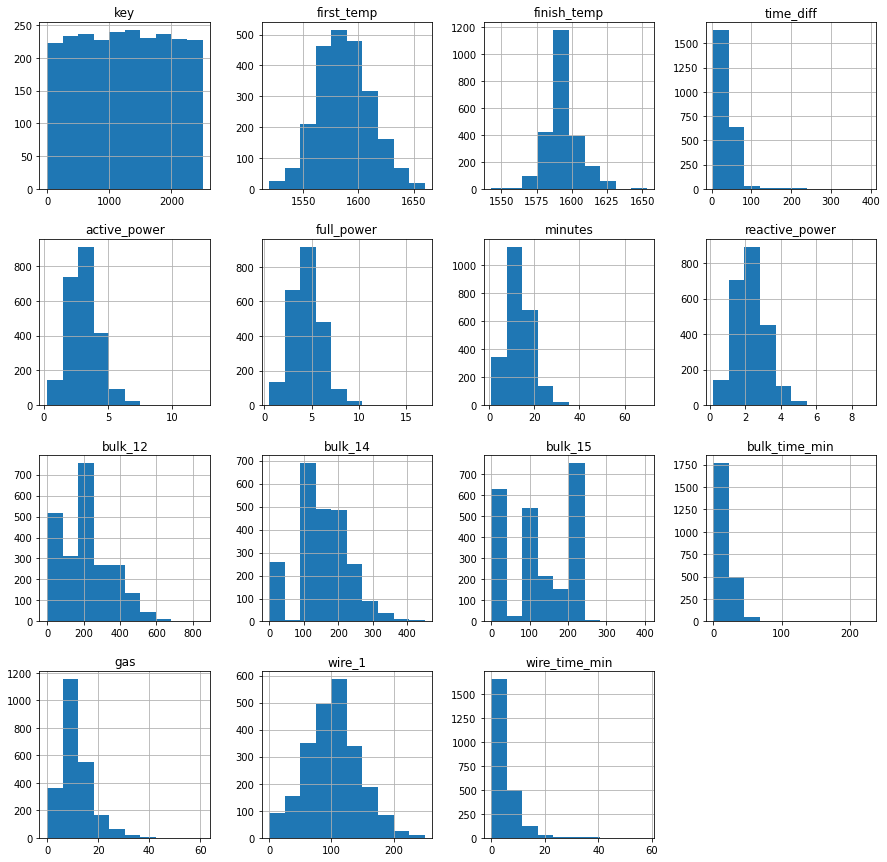

In [94]:
merged_data.hist(figsize = (15,15));

In [95]:
merged_data.corr()

,key,first_temp,finish_temp,time_diff,active_power,full_power,minutes,reactive_power,bulk_12,bulk_14,bulk_15,bulk_time_min,gas,wire_1,wire_time_min
key,1.000000,-0.018354,-0.093323,-0.028873,-0.024026,-0.026618,-0.029372,-0.021667,0.033662,-0.106205,-0.045292,-0.020983,-0.046881,-0.015147,0.030884
first_temp,-0.018354,1.000000,0.310496,0.200044,-0.166728,-0.175947,-0.398340,-0.163891,-0.084808,-0.181896,-0.060858,0.084374,0.020091,0.268979,0.013766
finish_temp,-0.093323,0.310496,1.000000,0.133903,0.187278,0.192697,0.292037,0.180986,0.264423,0.105834,0.264534,0.117092,0.076157,0.315718,-0.118575
time_diff,-0.028873,0.200044,0.133903,1.000000,0.529310,0.553737,0.556464,0.525856,0.220556,0.191270,0.118201,0.609656,0.418671,0.180334,0.178630
active_power,-0.024026,-0.166728,0.187278,0.529310,1.000000,0.993036,0.715465,0.992255,0.281215,0.300685,0.178125,0.385065,0.361400,0.151289,0.049882
full_power,-0.026618,-0.175947,0.192697,0.553737,0.993036,1.000000,0.749340,0.989073,0.293015,0.314757,0.183447,0.402410,0.375548,0.156120,0.052480
minutes,-0.029372,-0.398340,0.292037,0.556464,0.715465,0.749340,1.000000,0.707514,0.462265,0.461239,0.307058,0.436564,0.380646,0.066490,0.050404
reactive_power,-0.021667,-0.163891,0.180986,0.525856,0.992255,0.989073,0.707514,1.000000,0.280416,0.295845,0.176031,0.382344,0.358763,0.151667,0.048478
bulk_12,0.033662,-0.084808,0.264423,0.220556,0.281215,0.293015,0.462265,0.280416,1.000000,0.467222,0.638001,0.415411,0.182373,0.179046,-0.104159
bulk_14,-0.106205,-0.181896,0.105834,0.191270,0.300685,0.314757,0.461239,0.295845,0.467222,1.000000,0.270238,0.319115,0.262447,-0.054418,-0.031960


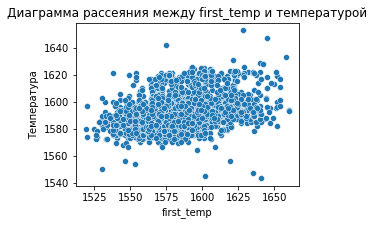

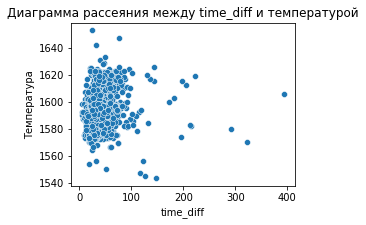

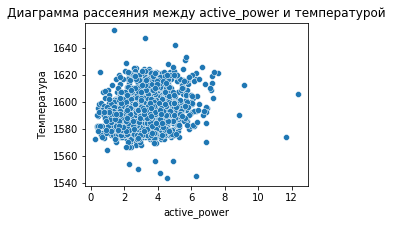

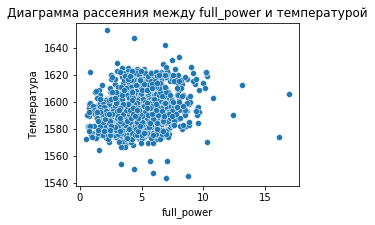

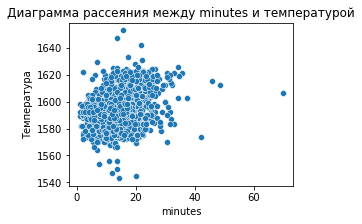

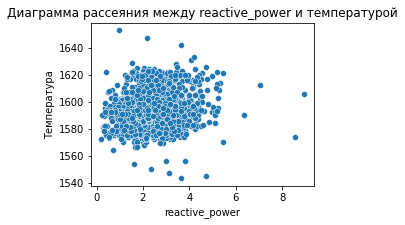

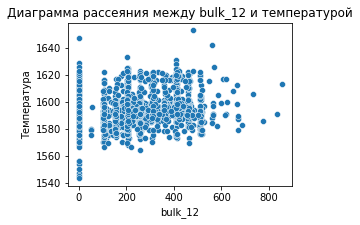

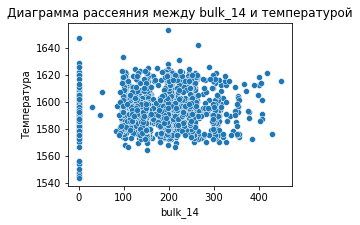

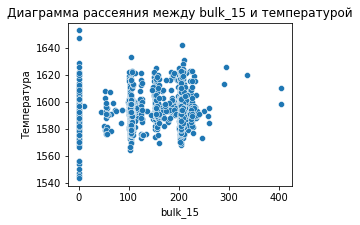

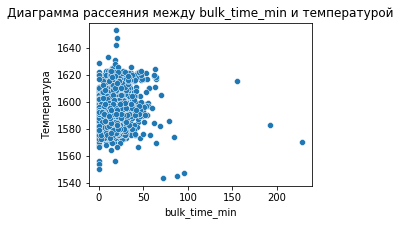

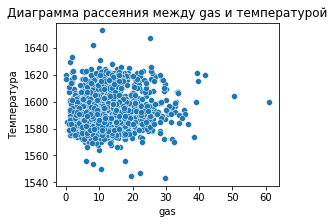

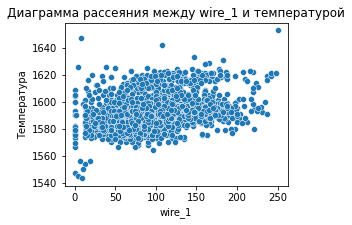

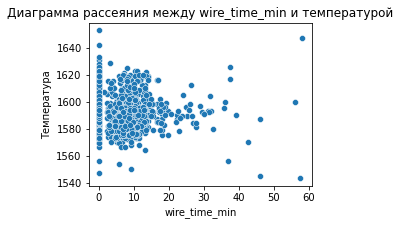

In [96]:
quantitative_features = merged_data.drop(['finish_temp', 'key'], axis = 1).columns
for feature in quantitative_features:
    plt.figure(figsize=(4, 3))
    sns.scatterplot(x=feature, y='finish_temp', data = merged_data)
    plt.title(f"Диаграмма рассеяния между {feature} и температурой")
    plt.xlabel(feature)
    plt.ylabel("Температура")
    plt.show()

Удалили из датасета пропуски. В данных не обнуражили коллениарности. Целевой признак `finish_temp` не сильно коррелирует с остальными признаками. Из обучающей выборке нужно будет удалить статистические выбросы.

# 5. Подготовка данных

In [97]:
X = merged_data.drop(['finish_temp', 'key'], axis = 1)
y = merged_data['finish_temp']

In [98]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.25, 
    random_state = RANDOM_STATE
)

In [99]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1743, 13) (581, 13)
(1743,) (581,)


Разделили данные на обучающую и тестовую выборки в соотношении 1/3. В обучающей выборке 1744 строк, а в тестовой 582.

In [100]:
X_train = X_train[X_train['gas'] < 60]
X_train = X_train[X_train['bulk_time_min'] < 100]
X_train = X_train[X_train['wire_time_min'] < 40]

Удалили статистические выбросы из обучающей выборки.

In [101]:
X_train.duplicated().sum()

0

In [102]:
X_test.duplicated().sum()

0

In [103]:
y_train = y_train.loc[X_train.index]

In [104]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1738, 13) (581, 13)
(1738,) (581,)


Создадим пайплайн для дальнейшего обучения моделей с подобранными гиперпараметрами.

In [105]:
num_columns  = ['first_temp',
                'time_diff',
                'active_power',
                'full_power',
                'minutes',
                'reactive_power',
                'bulk_12',	
                'bulk_14',
                'bulk_15',
                'bulk_time_min',
                'gas',
                'wire_1',
                'wire_time_min']

In [106]:
num_pipe = Pipeline([ ('minmax', MinMaxScaler()), ('standard', StandardScaler()) ])

data_preprocessor = ColumnTransformer(
    [
        ('num', num_pipe, num_columns)
    ], 
    remainder='passthrough'
)
pipeline = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeRegressor())
    ]
)

Разделили датафрейм на обучающую и тестовую выборку, удалили выбросы и создали пайплайн с использованием регрессора дерева решений.

# 6. Обучение моделей машинного обучения

На данном этапе обучим 3 модели регрессии и подберем гиперпараметры с помощью RandomizedSearchCV.

`LinearRegression`

In [107]:
param_grid_1 = [
    {
        'models': [LinearRegression()],
        'models__fit_intercept': [True, False],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    } 
]

In [108]:
rs_1 = RandomizedSearchCV(
    pipeline, 
    param_grid_1, 
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    random_state = RANDOM_STATE
)

In [109]:
start_time_1 = time.time()
rs_1.fit(X_train, y_train)
end_time_1 = time.time()
gs_time_1 = end_time_1 - start_time_1

In [110]:
mae_1 = abs(rs_1.best_score_)

In [111]:
cross_mae_1 = cross_val_score(rs_1, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
cross_mae_1 = -cross_mae_1

# --------------------------------------------------------------------------------------

`GradientBoostingRegressor`

In [112]:
param_grid_2 = [
    {
        'models': [GradientBoostingRegressor()],
        'models__max_depth': [3, 5, 7]
    }
]

In [113]:
rs_2 = RandomizedSearchCV(
    pipeline, 
    param_grid_2, 
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    random_state = RANDOM_STATE
)

In [114]:
start_time_2 = time.time()
rs_2.fit(X_train, y_train)
end_time_2 = time.time()
gs_time_2 = end_time_2 - start_time_2

In [115]:
mae_2 = abs(rs_2.best_score_)

In [116]:
cross_mae_2 = cross_val_score(rs_2, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
cross_mae_2 = -cross_mae_2

# --------------------------------------------------------------------------------------

`RandomForestRegressor`

In [117]:
param_grid_3 = [
    {
        'models': [RandomForestRegressor(random_state = RANDOM_STATE)],
        'models__n_estimators': [40 ,50, 60],
        'models__max_depth': [10, 20, 30]
    }
]

In [118]:
rs_3 = RandomizedSearchCV(
    pipeline, 
    param_grid_3, 
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    random_state = RANDOM_STATE
)

In [119]:
start_time_3 = time.time()
rs_3.fit(X_train, y_train)
end_time_3 = time.time()
gs_time_3 = end_time_3 - start_time_3

In [120]:
mae_3 = abs(rs_3.best_score_)

In [121]:
cross_mae_3 = cross_val_score(rs_3, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
cross_mae_3 = -cross_mae_3

# --------------------------------------------------------------------------------------

Обучили 3 модели и сохранили для каждой модели время обучения в секундах, лучшую метрику MAE на обучающей выборке и метрику MAE на кросс-валидации.

# 7. Выбор лучшей модели

Все результаты занесем в таблицу `result`.

In [122]:
results = pd.DataFrame({'LinearRegression': {'fit_time': gs_time_1,
                                             'mae': mae_1,
                                             'cross_mae': min(cross_mae_1)},
                         'GradientBoostingRegressor': {'fit_time': gs_time_2,
                                                   'mae': mae_2,
                                                   'cross_mae': min(cross_mae_2)},
                         'RandomForestRegressor': {'fit_time': gs_time_3,
                                            'mae': mae_3,
                                            'cross_mae': min(cross_mae_3)}})
results

,LinearRegression,GradientBoostingRegressor,RandomForestRegressor
fit_time,0.770917,8.929293,19.200555
mae,6.069404,6.056899,6.264435
cross_mae,5.687799,5.585713,5.816330


Получили, что модель градиентного бустинга `GradientBoostingRegressor` лучше всех справилась с задачей. На обучающей выборке метрика MAE = 6.053084, на кросс-валидации = 5.817608, а время обучения модели 15.487862 секунд, что меньше, чем у RandomForestRegressor. 

In [123]:
y_pred = rs_2.predict(X_test)
test_mae = mean_absolute_error(y_test, y_pred)
test_mae

6.027527726570121

In [124]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train, y_train)
dummy_pred = dummy_regr.predict(X_test)
dummy_mae = mean_absolute_error(y_test, dummy_pred)

if test_mae < dummy_mae:
    print("Эта модель является адекватной по сравнению с DummyRegressor.")
else:
    print("Эта модель является адекватной по сравнению с DummyRegressor.")

Эта модель является адекватной по сравнению с DummyRegressor.


In [125]:
dummy_mae

8.003817670814774

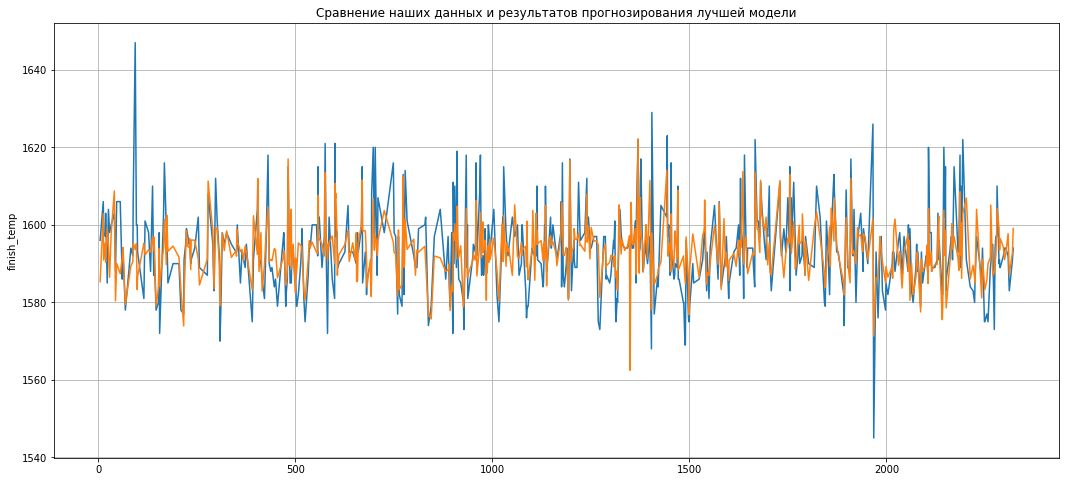

In [126]:
rcParams['figure.figsize'] = 18, 8
sns.lineplot(data=y_test, dashes=False)
sns.lineplot(x=y_test.index, y=y_pred, dashes=False)
plt.grid(True)
plt.title('Сравнение наших данных и результатов прогнозирования лучшей модели')
plt.show()

In [127]:
!pip install shap
import shap

     |████████████████████████████████| 980 kB 2.2 MB/s eta 0:00:01


In [128]:
best_model = rs_2.best_estimator_
explainer = shap.TreeExplainer(best_model.named_steps['models'])
shap_values = explainer.shap_values(X_test)

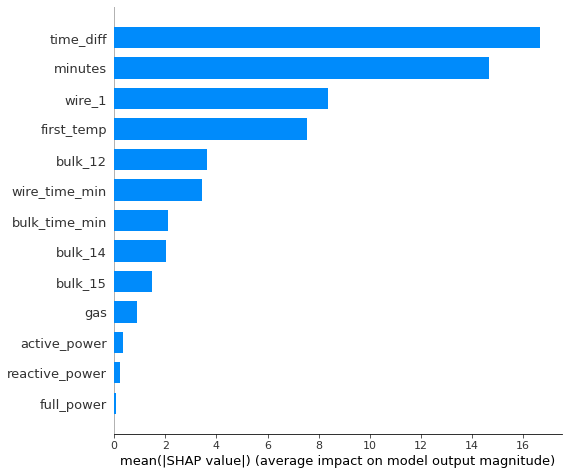

In [129]:
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, max_display=25, plot_type = 'bar')
plt.show()

Из графика важности признаков можно сказать, что для предсказания конечной температуры стоит в приоритете длительность нагрева ковша дугой, затем идет разница во времени замеров начальной и конечной температур, и потом начальная температура. Почти никакой роли не играют такие признаки, как продувка сплава газом, замеры времени проволочных и сыпучих материалов, активная, реактивная и полная мощности.

# 8. Общий вывод и рекомендации заказчику

Модель градиентного бустинга `GradientBoostingRegressor` показала лучшие результаты в предсказании конечной температуры процесса нагрева металла. Она имеет более низкую ошибку и временные затраты на обучение. 

Рекомендации для заказчика:
1. Продолжать использовать модель градиентного бустинга для прогнозирования конечной температуры в процессе нагрева металла.
2. Обратить внимание на признаки, которые оказывают наибольшее влияние на конечную температуру (длительность нагрева ковша дугой, разница во времени замеров начальной и конечной температур, начальная температура) и уделить им особое внимание в процессе управления производством. 
3. Провести дополнительный анализ и оптимизацию других факторов, таких как продувка сплава газом, замеры времени проволочных и сыпучих материалов, активная, реактивная и полная мощности, чтобы выявить их потенциальное влияние на конечную температуру и возможность их оптимизации.